# Feature Engineering and Model Selection 


Feature engineering and model selection are crucial building blocks in data science because they significantly impact the quality of insights you extract from your data. Feature engineering involves transforming raw data into a format that's more interpretable and usable for machine learning models. By carefully selecting and creating features, you essentially guide the model towards the patterns you want it to learn. On the other hand, model selection involves choosing the right algorithm for the task at hand. A well-chosen model can leverage the features effectively, leading to accurate predictions or insights. 

In [25]:
import pandas as pd
import numpy
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error  # Import additional metrics

import itertools
from itertools import chain


In [3]:
df = pd.read_csv("All_Data_Cleaned.csv")
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_5660\1949297731.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("All_Data_Cleaned.csv")


,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,5,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,...,354.74,312.20,596.18,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


# Feature engineering and model selection: Build multiple linear regression models to predict total lift (TotalKg) using different combinations of features (e.g., BodyweightKg, Best3SquatKg, Best3BenchKg, Best3DeadliftKg, Age, Wilks).
Experiment with different feature combinations and compare the performance of each model using metrics like R-squared or adjusted R-squared. This helps identify the most relevant features for predicting total lift.


In [4]:
# Identifying numeric columns
df.dtypes

Unnamed: 0           int64
Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Squat4Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Bench4Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Deadlift4Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Country             object
Federation          object
Date                object
MeetCountry         object
MeetState           object
M

All Squat , Bench and Deadlift lifts, Wilks, Glossbrenner, IPFPPoints, Age and Weight are numeric columns 

In [5]:
df.describe()

,Unnamed: 0,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,9.790790e+05,464026.000000,974311.000000,313715.000000,310293.000000,301976.000000,3474.000000,979079.000000,313559.000000,310842.000000,...,313913.000000,309170.000000,296000.000000,5082.000000,979079.000000,979079.000000,972187.000000,972187.000000,972187.000000,971466.000000
mean,6.907381e+05,29.645388,82.971471,125.041338,103.153840,39.038959,74.752899,174.914313,90.255317,63.946488,...,169.185990,135.154418,15.507139,74.683125,186.944175,471.445053,345.152324,353.024559,325.323388,469.912807
std,4.019455e+05,12.204421,22.874176,135.758909,165.921094,197.928256,193.012256,67.511385,82.189380,112.415105,...,98.036161,158.797715,215.211510,196.823954,60.711099,171.290240,81.844370,84.225906,80.371694,105.084135
min,0.000000e+00,14.000000,22.300000,-526.170000,-580.000000,-600.500000,-550.000000,20.400000,-427.500000,-455.000000,...,-405.000000,-445.000000,-587.500000,-461.000000,20.400000,61.230000,42.030000,43.650000,39.850000,2.160000
25%,3.459555e+05,20.500000,65.850000,95.000000,82.500000,-160.000000,-107.375000,122.500000,60.000000,45.000000,...,130.000000,120.000000,-210.000000,-136.000000,138.350000,335.000000,287.220000,292.870000,267.900000,392.280000
50%,6.839890e+05,26.000000,80.900000,150.000000,150.000000,117.500000,137.500000,170.000000,100.000000,95.000000,...,180.000000,180.000000,120.000000,150.000000,183.700000,460.000000,339.230000,346.720000,320.050000,461.420000
75%,1.045372e+06,36.000000,97.800000,202.500000,207.500000,195.000000,210.000000,217.500000,140.000000,140.000000,...,227.500000,230.000000,205.000000,214.830000,230.000000,585.130000,396.260000,406.280000,376.590000,540.450000
max,1.423351e+06,95.500000,250.050000,555.000000,566.990000,560.000000,505.500000,575.000000,425.000000,442.500000,...,425.000000,442.500000,457.500000,410.000000,457.500000,1367.500000,779.380000,804.400000,742.960000,1128.710000


# Predicting the TotalKg

In [6]:
# Setting values

X = df[["Best3SquatKg","Best3DeadliftKg","Best3BenchKg","Wilks","Glossbrenner","IPFPoints","Age","BodyweightKg"]]
y = df['TotalKg']

## Exploratory Data Analysis

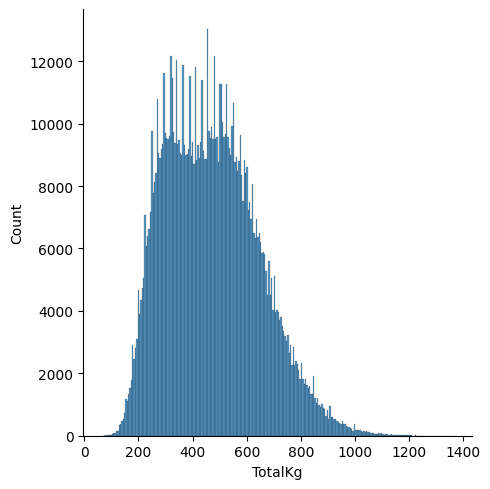

In [7]:
sns.displot(y)

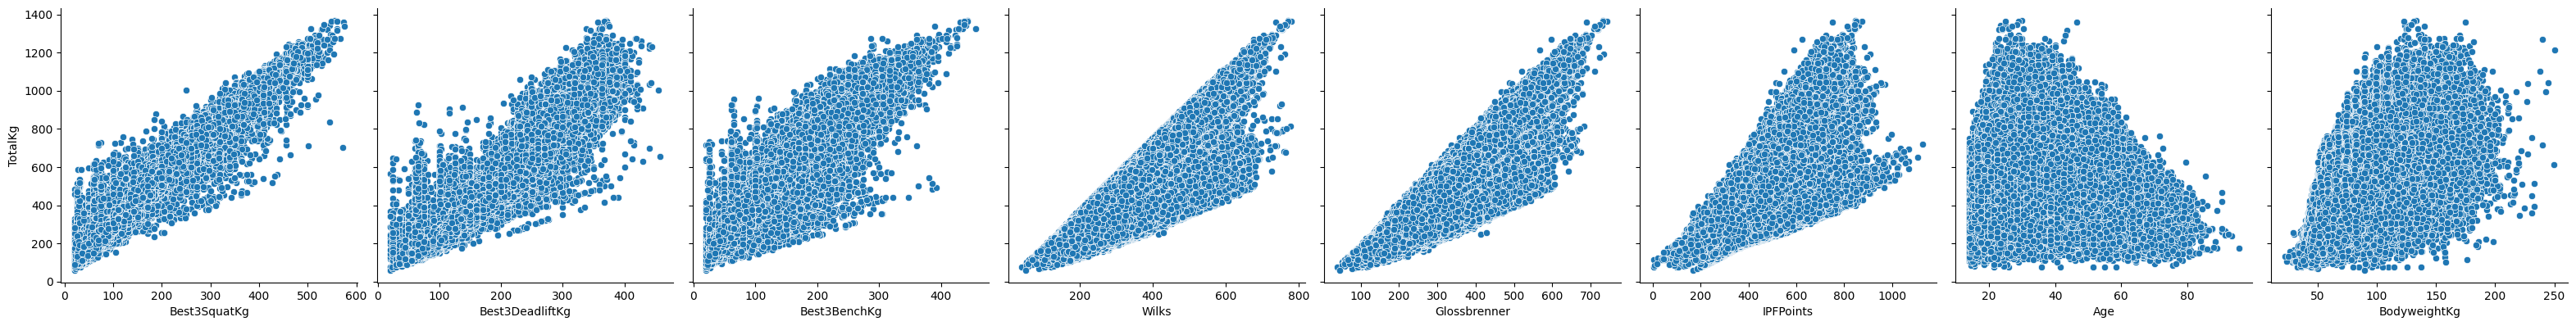

In [8]:
sns.pairplot(df, x_vars=["Best3SquatKg","Best3DeadliftKg","Best3BenchKg","Wilks","Glossbrenner","IPFPoints","Age","BodyweightKg"], y_vars=["TotalKg"], kind= "scatter", aspect=1, height=4)

Pairplots show strong positive correlations between the "Big 3 lifts" and scoring systems, as expected. Age and bodyweight have less clear relationships with lifting performance.

## Dealing with missing values

In [9]:
model_df = df[["Best3SquatKg", "Best3DeadliftKg", "Best3BenchKg", "Wilks", "Glossbrenner", "IPFPoints", "Age", "BodyweightKg", "TotalKg"]]
model_df.shape

(979079, 9)

In [10]:
model_df = model_df.dropna()
model_df.shape

(461675, 9)

In [11]:
X = model_df[["Best3SquatKg","Best3DeadliftKg","Best3BenchKg","Wilks","Glossbrenner","IPFPoints","Age","BodyweightKg"]]
y = model_df['TotalKg']

## Building a model 

I need to split my dataset into training and testing sets. I will be using a 70/30 train test split

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [13]:
X_train.isna().sum()

Best3SquatKg       0
Best3DeadliftKg    0
Best3BenchKg       0
Wilks              0
Glossbrenner       0
IPFPoints          0
Age                0
BodyweightKg       0
dtype: int64

In [14]:
y_train.shape

(323172,)

In [15]:
y_test.shape

(138503,)

In [16]:
X_train.shape

(323172, 8)

In [17]:
reg_model = LinearRegression().fit(X_train,y_train)

In [18]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  0.00399960054744497


[('Best3SquatKg', 1.000012623302384),
 ('Best3DeadliftKg', 1.0000041680582377),
 ('Best3BenchKg', 1.0000098154928831),
 ('Wilks', -1.4171665356776941e-05),
 ('Glossbrenner', -1.5919170407885375e-05),
 ('IPFPoints', 7.583668908295316e-06),
 ('Age', -1.755846497141552e-05),
 ('BodyweightKg', -2.2412207657335204e-05)]

In [82]:
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [81]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
594571,454.99,454.999839
478704,670.00,669.998679
587162,337.50,337.499485
553767,490.00,489.999790
519122,310.70,310.700006
...,...,...
726121,397.50,397.496833
473341,617.50,617.499406
492329,495.00,494.998706
501015,392.50,392.498408


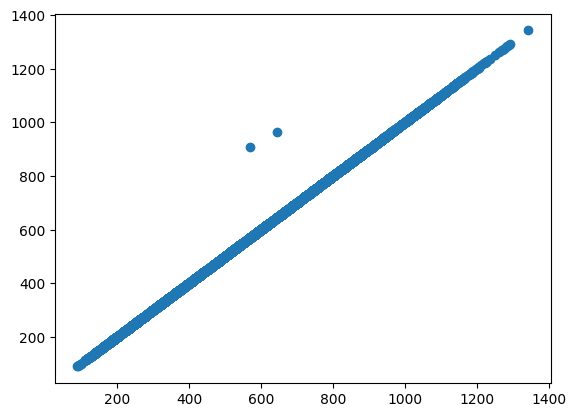

In [80]:
plt.scatter(reg_model_diff["Actual value"],reg_model_diff["Predicted value"])

In [79]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.007137859325208277
Mean Square Error: 1.574476190637497
Root Mean Square Error: 1.2547813318014804


## Developing multiple models

In [23]:
model_df.isna().sum()

Best3SquatKg       0
Best3DeadliftKg    0
Best3BenchKg       0
Wilks              0
Glossbrenner       0
IPFPoints          0
Age                0
BodyweightKg       0
TotalKg            0
dtype: int64

In [83]:
stuff = ["Best3SquatKg","Best3DeadliftKg","Best3BenchKg","Wilks","Glossbrenner","IPFPoints","Age","BodyweightKg"]

X = model_df[stuff]  # Features
y = model_df["TotalKg"]  # Target variable
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

dict = {}


# Creating a loop for all models 
for L in range(1,len(stuff) + 1):
    for subset in itertools.combinations(stuff, L):
        subset = list(subset)
        
        subset.append("TotalKg") # Adding the target variable

        # Creating a temporary df to use the model
        temp_df = df[subset]
        col_names = temp_df.columns.tolist()
        
        # Test and Training data
        X_model_train = X_train[col_names[:-1]]
        y_model_train = y_train
        X_model_test = X_test[col_names[:-1]]
        y_model_test = y_test

        # Creating a linear regression model 
        reg_model = LinearRegression().fit(X_model_train, y_model_train)

        # Calculating an R2
        r2 = reg_model.score(X_model_test, y_model_test)

        # Adding keys to a dictionary for further analysis
        key = str(col_names[:-1])
        dict[key] = r2

        

In [68]:
# Printing the top 5 values 
values = list(dict.values())

top_5_idx = np.argsort(values)[-5:]
top_5_values = [values[i] for i in top_5_idx]

value_to_key = {}


for val in top_5_values:
    for key, dict_val in dict.items():
        if val == dict_val:
            value_to_key[val] = key
            break


print("Top 5 models and their corresponding r2:")
for val, key in value_to_key.items():
    print(f"Model: {key}, R2: {val}")

Top 5 models and their corresponding r2:
Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'IPFPoints', 'BodyweightKg'], R2: 0.9999505076604195
Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'Age'], R2: 0.9999505077182504
Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg'], R2: 0.9999505077282004
Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'Age', 'BodyweightKg'], R2: 0.9999505077522406
Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'BodyweightKg'], R2: 0.9999505077623287


Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'IPFPoints', 'BodyweightKg'], R2: 0.9999505076604195

This model includes 'Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'IPFPoints', and 'BodyweightKg' as predictors.
It achieves an R2 value of approximately 0.99995, indicating that it explains 99.995% of the variance in the target variable ('TotalKg').
This model likely benefits from including multiple key features related to strength metrics (squat, deadlift, bench), body weight, and competitive points (IPFPoints).

Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'Age'], R2: 0.9999505077182504

This model includes 'Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', and 'Age' as predictors.
It achieves a very high R2 value of approximately 0.99995, similar to the first model.
Age is added as an additional predictor here, showing its relevance alongside strength metrics in predicting 'TotalKg'.

Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg'], R2: 0.9999505077282004

This model includes only the basic strength metrics ('Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg').
Despite fewer predictors, it still achieves an exceptionally high R2 value of approximately 0.99995.
Indicates that these three strength metrics alone can explain a vast majority of the variance in 'TotalKg'.

Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'Age', 'BodyweightKg'], R2: 0.9999505077522406

This model adds both 'Age' and 'BodyweightKg' to the basic strength metrics.
Achieves a slightly higher R2 value than the previous models, indicating that age and body weight contribute additional predictive power.
  
Model: ['Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'BodyweightKg'], R2: 0.9999505077623287

This model includes 'BodyweightKg' alongside the basic strength metrics.
It achieves a very high R2 value, similar to the other models with additional predictors.
Shows that body weight alone can also be a significant predictor alongside strength metrics.

([], [])

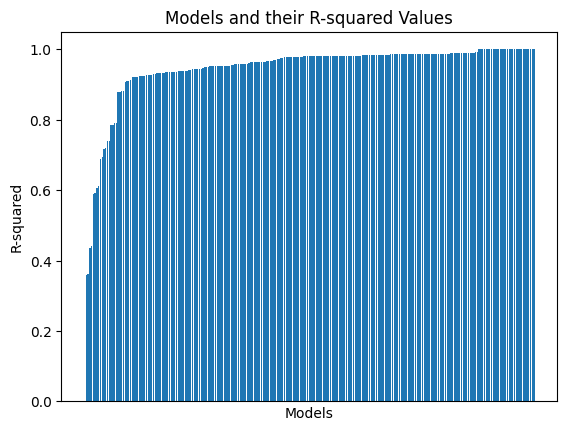

In [86]:
values = sorted(list(dict.values()))

sorted_models = sorted(dict.items(), key=lambda x: x[1], reverse=True)
models = [model[0] for model in sorted_models]
r2_values = [model[1] for model in sorted_models]

plt.figure()
plt.bar(range(len(dict)),values)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Models and their R-squared Values')
plt.xticks([])
